In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [3]:
bs = 64

In [6]:
# Creating an image databunch
data = (ImageList.from_folder('all_data')
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(), size=224)
       .databunch(bs=bs))
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
learn.load('fast_split_34_final_dropout_aug_128_stage_2_best')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fake,fake,fake,fake,fake
Path: all_data;

Valid: LabelList (105 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
original,fake,original,fake,fake
Path: all_data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [8]:
def test_2_images(images, labels):
    test_images = ['Fake', 'Original']
    for i, image in enumerate(images):
        show_image(image)
        pred = learn.predict(image)
        plt.title(f"Actual:{labels[i]}, Prediction={data.classes[pred[1].item()]}")
        plt.show()

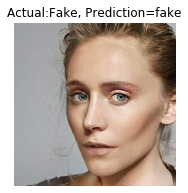

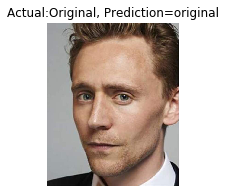

In [11]:
fake_img = open_image('imgs/test_f.jpeg')
orig_img = open_image('imgs/test_o.jpeg')

test_2_images([fake_img, orig_img], ['Fake', 'Original'])